In [1]:
# import statements
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from urllib.request import urlopen, Request
import re

In [ ]:
# fangraphs projection systems

In [2]:
url = 'https://www.fangraphs.com/statss.aspx?playerid=16472&position=1B/OF'
req = Request(url)
page = urlopen(req)
soup = BeautifulSoup(page, 'lxml')

In [13]:
soup.find_all('tr', {'class' : 'rgRow grid_projections_show'})

[<tr class="rgRow grid_projections_show" id="SeasonStats1_dgSeason11_ctl00__7">
 <td class="grid_line_regular">2018</td><td class="grid_line_regular"><a href="projections.aspx?pos=all&amp;stats=bat&amp;type=thebat">THE BAT</a></td><td align="right" class="grid_line_regular">146</td><td align="right" class="grid_line_regular">628</td><td align="right" class="grid_line_regular">39</td><td align="right" class="grid_line_regular">86</td><td align="right" class="grid_line_regular">102</td><td align="right" class="grid_line_regular">3</td><td align="right" class="grid_line_break">11.2 %</td><td align="right" class="grid_line_regular">23.5 %</td><td align="right" class="grid_line_regular">.272</td><td align="right" class="grid_line_regular">.281</td><td align="right" class="grid_line_break">.259</td><td align="right" class="grid_line_regular">.349</td><td align="right" class="grid_line_regular">.532</td><td align="right" class="grid_line_regular">.368</td><td align="right" class="grid_line_re

In [21]:
for x in soup.find_all('tr', {'class' : 'rgRow grid_projections_show'}):
    print(x)

<tr class="rgRow grid_projections_show" id="SeasonStats1_dgSeason11_ctl00__7">
<td class="grid_line_regular">2018</td><td class="grid_line_regular"><a href="projections.aspx?pos=all&amp;stats=bat&amp;type=thebat">THE BAT</a></td><td align="right" class="grid_line_regular">146</td><td align="right" class="grid_line_regular">628</td><td align="right" class="grid_line_regular">39</td><td align="right" class="grid_line_regular">86</td><td align="right" class="grid_line_regular">102</td><td align="right" class="grid_line_regular">3</td><td align="right" class="grid_line_break">11.2 %</td><td align="right" class="grid_line_regular">23.5 %</td><td align="right" class="grid_line_regular">.272</td><td align="right" class="grid_line_regular">.281</td><td align="right" class="grid_line_break">.259</td><td align="right" class="grid_line_regular">.349</td><td align="right" class="grid_line_regular">.532</td><td align="right" class="grid_line_regular">.368</td><td align="right" class="grid_line_regu

In [ ]:
import bs4, urllib, sqlite3
db_connection = sqlite3.connect('myDBName')
def main():
  #Connect to DB
  db_connection = sqlite3.connect('myDBName')

  # replace 123456 with your own league id
  week = 1
  baseUrl = 'http://games.espn.com/flb/boxscorefull?leagueId=19898&teamId=12&scoringPeriodId={}&seasonId=2018&view=scoringperiod&version=full'.format(week)
  limit = 14;
  while matchupPeriodId < limit:
    # Send a GET request for info
    geturl = baseUrl
    # you might need to format the url bc I've run into pages that require a valid user agent:
    # urlReq = urllib2.Request(geturl, headers={'User-Agent' : 'Chrome/40.0.2214.111'})
    # which would change the blow line to: html_page = urllib2.urlopen(urlReq).read()
    html_page = urllib2.urlopen(geturl).read();
    # start parsing
    soup = bs4.BeautifulSoup(html_page);
    # this is where you get to spend a bunch of time looking at the source so that you know what to parse out here
    # as an example:
    scoringdiv = soup.find('div', {'id' : 'scoreboardMatchups'});
    if (scoringdiv):
      # stuff like:
      rows = scoringdiv.findAll('tr')
      for row in rows:
        teamnamesection = row.find('td', {'class': teamName})
        if (teamnamesection):
          teamnameanchor = teamnamesection.find('a')
          if (teamnameanchor):
            if teamnameanchor.has_attr('title'):
              teamname = teamnameanchor['title']
        # once you have the info you want, write to database
        cursor = db_connection.cursor();
        cursor.execute('''INSERT INTO MYTABLE(TEAMNAME, COLUMN2, COLUMN3) VALUES(?,?,?)''', (teamname, etc, etc));
db_connection.commit()
#db_connection.close()

In [66]:
# Test for Setting paramters for scraping beer list
# First scrape of urls from the top 50 list

base_url = 'http://games.espn.com/flb/clubhouse?leagueId=19898&teamId=1&seasonId=2018'
#hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(base_url)#,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page, 'lxml')

In [70]:
test = soup.find('td', {'class': 'playertableStat'})

AttributeError: 'NoneType' object has no attribute 'contents'

In [71]:
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html>
<head>
<title>Log In -  ESPN</title>
<!-- N7-326:2295-->
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="Play Fantasy Baseball for free on ESPN! Expert analysis, live scoring, mock drafts, and more." property="og:description"/>
<meta content="http://g.espncdn.com/lm-static/flb17/images/share/facebook.png" property="og:image"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="@ESPNFantasy" name="twitter:site"/>
<meta content="ESPN Fantasy Baseball - Play For Free" name="twitter:title"/>
<meta content="http://g.espncdn.com/lm-static/flb17/images/share/twitter.png" name="twitter:image"/><meta content="no-cache" http-equiv="Pragma"/>
<meta content="no-cache, must-revalidate, proxy-revalidate, maxage=0" http-equiv="Cache-

In [72]:
from os import environ
from datetime import datetime
from collections import namedtuple
import unicodedata
import logging
import requests as r
from bs4 import BeautifulSoup as BS
import sendgrid

_log = logging.getLogger(__name__)
_log.addHandler(logging.StreamHandler())
_log.setLevel(logging.DEBUG)

_MY_EMAIL = 'ben.brostoff@gmail.com'
_SGRID_KEY = environ.get('SGRID_KEY')
_EMAIL_CLIENT = sendgrid.SendGridClient(_SGRID_KEY)

Player = namedtuple('Player', 'name owned picked_up')
_batters = {
  'url': 'http://games.espn.go.com/flb/freeagency?leagueId=17672&seasonId=2016',
  'name': 'Batters'
}
_pitchers = {
  'url': _batters['url'] + '&slotCategoryGroup=2',
  'name': 'Pitchers'
}

def _soupify(link):
    return BS(r.get(link).text, 'html.parser')

def _normalize(text):
    return unicodedata.normalize('NFKD', text).encode('ascii','ignore')

def _colorize(val, limit=0):
    if float(val) > limit: return 'green'
    else: return 'black'

def _scrape():
    """
    Fingers crossed ESPN doesn't change their UI...
    """
    html = ''
    for l in _batters, _pitchers:
        html += '<h3>{}</h3>'.format(l['name'])
        players = []
        for row in _soupify(l['url']).select('.playerTableTable tr'):
            try:
                player = row.findAll(class_="playertablePlayerName")
                p_name = _normalize(player[0].text)
                picked_up = _normalize(row.find_all('td')[-1].text)
                owned = _normalize(row.find_all('td')[-2].text)
                if float(picked_up) > 0:
                    players.append(Player(name=p_name, 
                                          owned=owned, picked_up=picked_up ))
            except Exception, e:
                _log.debug('Error getting ESPN update: {}'.format(e))


        for p in sorted(players, key=lambda x: float(x.picked_up), reverse=True): 
              to_add = "<p>{} <span style='color:{}'>{}</span>(<span style='color:{}'>{}</span>)</p>" \
                   .format(p.name, _colorize(p.owned, limit=30), 
                    p.owned, _colorize(p.picked_up, limit=10), p.picked_up)
              html += to_add

    return html

def send():
    message = sendgrid.Mail()
    message.add_to(_MY_EMAIL)
    message.set_from(_MY_EMAIL)
    message.set_subject(datetime.now().strftime("%B %d, %Y") + ' FB2016 Report')
    message.set_html(_scrape())
    sent = _EMAIL_CLIENT.send(message)
    _log.info(sent)

if __name__ == '__main__':
    send()

SyntaxError: invalid syntax (<ipython-input-72-7aa80a2d31b9>, line 55)

In [ ]:
# edited

class ESPNClientV1(object):

    envType = ''
    # Creates a session var to store a connection session
    # (in order to do not need to open a new connection for each request)
    session = None
    defaultTimeOut = 5

    def __init__(self, options, environmentType):

        self.options = options
        global envType

        try:
            envType = environmentType.value
        except AttributeError:
            # The environmentType informed is not an enum, will get as a string
            envType = environmentType

        global playerlistUrl
        playerlistUrl= "http://games.espn.com/flb/freeagency?leagueId=19898&teamId=12&seasonId=2018"
    

        global tokenUrl
        tokenUrl = self.options['tokenUrlWeb']

        self.session = requests.Session()

        self.tokenHeader = dict({
            'origin': "https://www.playtogga.com",
            'accept-encoding': "gzip, deflate, br",
            'accept-language': "en-US,en;q=0.8",
            'user-agent': self.options['userAgent'],
            'content-type': "application/x-www-form-urlencoded",
            'accept': "*/*",
            'referer': "https://www.playtogga.com/",
            'authority': "api.branch.io",
            'if-none-match': "W/^\^5-734881840^^",
            'cache-control': "no-cache"
        })

        self.playerlistheader = dict({
            'origin': "https://www.playtogga.com",
            'accept-encoding': "gzip, deflate, br",
            'accept-language': "en-US,en;q=0.8",
            'user-agent': self.options['userAgent'],
            'content-type': "application/x-www-form-urlencoded",
            'accept': "application/json, text/plain, */*",
            'referer': self.options['leagueRef'],
            'authority': "api.playtogga.com",
            'cookie': self.options['cookie'],
            'cache-control': "no-cache"
        })
        # self.session.headers.update(self.playerlistheader)

    def getPlayerList(self, headers=None):
        if headers is None:
            headers = self.playerlistheader
        timeoutInSeconds = 30
        payload = dict({
            # This is our team and league ids (hide when public repo)
            "league_id": self.options['leagueId'],
            "team_id": self.options['teamId']
        })
        urlToGet = self.getUrl("playerListUrl")
        try:
            response = self.doPostRequestAndCheckToken(
                urlToGet,
                data=payload,
                headers=headers,
                timeout=timeoutInSeconds
            )
            print(response.status_code)
            if(response.status_code == 200 or response.status_code == 204):
                jresponse = response.json()
                players = jresponse['info']
                return players
            else:
                print('Bad Status Return: {}'.format(response.status_code))
        except Exception as e:
            print(e)

    def getPlayerInfo(self, headers=None, player_id=None):
        if headers is None:
            headers = self.playerlistheader
        timeoutInSeconds = 30
        if player_id is None:
            player_id = "p51938"
        payload = dict({
            # This is the player id
            "player_id": str(player_id)
        })
        urlToGet = self.getUrl("playerInfoUrl")
        try:
            response = self.doPostRequestAndCheckToken(
                urlToGet,
                data=payload,
                headers=headers,
                timeout=timeoutInSeconds
            )
            if(response.status_code == 200 or response.status_code == 204):
                jresponse = response.json()
                players = jresponse['info']
                return players
            else:
                print('Bad Status Return: {}'.format(response.status_code))
        except Exception as e:
            print(e)

    def getUrl(self, urlPrefix):
        urlToken = urlPrefix + envType
        urlToGet = globals()[urlToken]
        self.checkValidUrl(urlToGet)
        return urlToGet

    def createToken(self):
        headers = self.tokenHeader
        timeoutInSeconds = 30
        urlToGet = self.getUrl("tokenUrl")
        try:
            response = self.session.get(
                urlToGet,
                headers=headers,
                timeout=timeoutInSeconds)
            if(response.status_code == 200 or
                    response.status_code == 201 or
                    response.status_code == 204):
                print("Token Success")
        except Exception as e:
            print("Get Token Failure: {}".format(e))

    def doPostRequestAndCheckToken(
            self,
            urlToGet,
            data=None,
            headers=None,
            timeout=None,
            retryOnAuthorized=True
    ):

        response = self.session.post(
            urlToGet,
            data=data,
            headers=headers,
            timeout=timeout
        )

        if ((response.status_code == 401 or response.status_code == 403) and
                retryOnAuthorized):
            print("Bad url or params. Try updating cookie?\n" +
                  "Response code: {0}".format(response.status_code)
                  )
            self.createToken()
            response = self.doGetRequestAndCheckToken(
                urlToGet,
                data=data,
                timeout=timeout,
                headers=headers,
                retryOnAuthorized=False)
        return response

    def raiseInvalidStatus(self, statusCode, bodyText):
        raise Exception("Received status [" +
                        str(statusCode) +
                        "] from request. Body of message returned [" +
                        bodyText +
                        "]")

    def checkValidUrl(self, urlToCheck):
        if(urlToCheck is None or urlToCheck == ''):
            raise ValueError("It's not possible to parse service URL.")

In [73]:
# Raw

class ToggaClientV1(object):

    envType = ''
    # Creates a session var to store a connection session
    # (in order to do not need to open a new connection for each request)
    session = None
    defaultTimeOut = 5

    def __init__(self, options, environmentType):

        self.options = options
        global envType

        try:
            envType = environmentType.value
        except AttributeError:
            # The environmentType informed is not an enum, will get as a string
            envType = environmentType

        global playerListUrl
        playerListUrl = "https://api.playtogga.com/players/getplayerlist"

        global playerInfoUrl
        playerInfoUrl = "https://api.playtogga.com/players/getplayerinfo"

        global tokenUrl
        tokenUrl = self.options['tokenUrlWeb']

        self.session = requests.Session()

        self.tokenHeader = dict({
            'origin': "https://www.playtogga.com",
            'accept-encoding': "gzip, deflate, br",
            'accept-language': "en-US,en;q=0.8",
            'user-agent': self.options['userAgent'],
            'content-type': "application/x-www-form-urlencoded",
            'accept': "*/*",
            'referer': "https://www.playtogga.com/",
            'authority': "api.branch.io",
            'if-none-match': "W/^\^5-734881840^^",
            'cache-control': "no-cache"
        })

        self.playerlistheader = dict({
            'origin': "https://www.playtogga.com",
            'accept-encoding': "gzip, deflate, br",
            'accept-language': "en-US,en;q=0.8",
            'user-agent': self.options['userAgent'],
            'content-type': "application/x-www-form-urlencoded",
            'accept': "application/json, text/plain, */*",
            'referer': self.options['leagueRef'],
            'authority': "api.playtogga.com",
            'cookie': self.options['cookie'],
            'cache-control': "no-cache"
        })
        # self.session.headers.update(self.playerlistheader)

    def getPlayerList(self, headers=None):
        if headers is None:
            headers = self.playerlistheader
        timeoutInSeconds = 30
        payload = dict({
            # This is our team and league ids (hide when public repo)
            "league_id": self.options['leagueId'],
            "team_id": self.options['teamId']
        })
        urlToGet = self.getUrl("playerListUrl")
        try:
            response = self.doPostRequestAndCheckToken(
                urlToGet,
                data=payload,
                headers=headers,
                timeout=timeoutInSeconds
            )
            print(response.status_code)
            if(response.status_code == 200 or response.status_code == 204):
                jresponse = response.json()
                players = jresponse['info']
                return players
            else:
                print('Bad Status Return: {}'.format(response.status_code))
        except Exception as e:
            print(e)

    def getPlayerInfo(self, headers=None, player_id=None):
        if headers is None:
            headers = self.playerlistheader
        timeoutInSeconds = 30
        if player_id is None:
            player_id = "p51938"
        payload = dict({
            # This is the player id
            "player_id": str(player_id)
        })
        urlToGet = self.getUrl("playerInfoUrl")
        try:
            response = self.doPostRequestAndCheckToken(
                urlToGet,
                data=payload,
                headers=headers,
                timeout=timeoutInSeconds
            )
            if(response.status_code == 200 or response.status_code == 204):
                jresponse = response.json()
                players = jresponse['info']
                return players
            else:
                print('Bad Status Return: {}'.format(response.status_code))
        except Exception as e:
            print(e)

    def getUrl(self, urlPrefix):
        urlToken = urlPrefix + envType
        urlToGet = globals()[urlToken]
        self.checkValidUrl(urlToGet)
        return urlToGet

    def createToken(self):
        headers = self.tokenHeader
        timeoutInSeconds = 30
        urlToGet = self.getUrl("tokenUrl")
        try:
            response = self.session.get(
                urlToGet,
                headers=headers,
                timeout=timeoutInSeconds)
            if(response.status_code == 200 or
                    response.status_code == 201 or
                    response.status_code == 204):
                print("Token Success")
        except Exception as e:
            print("Get Token Failure: {}".format(e))

    def doPostRequestAndCheckToken(
            self,
            urlToGet,
            data=None,
            headers=None,
            timeout=None,
            retryOnAuthorized=True
    ):

        response = self.session.post(
            urlToGet,
            data=data,
            headers=headers,
            timeout=timeout
        )

        if ((response.status_code == 401 or response.status_code == 403) and
                retryOnAuthorized):
            print("Bad url or params. Try updating cookie?\n" +
                  "Response code: {0}".format(response.status_code)
                  )
            self.createToken()
            response = self.doGetRequestAndCheckToken(
                urlToGet,
                data=data,
                timeout=timeout,
                headers=headers,
                retryOnAuthorized=False)
        return response

    def raiseInvalidStatus(self, statusCode, bodyText):
        raise Exception("Received status [" +
                        str(statusCode) +
                        "] from request. Body of message returned [" +
                        bodyText +
                        "]")

    def checkValidUrl(self, urlToCheck):
        if(urlToCheck is None or urlToCheck == ''):
            raise ValueError("It's not possible to parse service URL.")

In [74]:
client = ToggaClientV1(environmentType='')


TypeError: __init__() missing 1 required positional argument: 'options'

In [22]:
import sys
from bs4 import BeautifulSoup
import requests
import sqlite3

# Player attributes as parsed from ESPN lineups page
player_attr = {'SLOT': 'slot',
               'PLAYER': 'player',
               'TEAM': 'team',
               'POS': 'position',
               'OPP': 'opponent',
               'STATUS ET': 'game_status',
               'PRK': 'player_rank',
               'PTS': 'points',
               'AVG': 'average_points',
               'LAST': 'last_points',
               'PROJ': 'projected_points',
               'OPRK': 'opponent_rank',
               '%ST': 'percent_start',
               '%OWN': 'percent_own',
               '+/-': 'percent_ownership_change'}


def get_num_teams(league_id, season_id):
    """
    Get the number of teams in the league from the league settings page.
    """
    url = 'http://games.espn.com/ffl/leaguesetup/settings?leagueId={}&seasonId={}'.format(league_id, season_id)
    soup = BeautifulSoup(requests.get(url).text, 'lxml')
    table_settings = soup.find_all('table')
    table_settings = table_settings[1]

    rows = table_settings.find_all('tr')
    for row in rows:
        fields = [val.get_text() for val in row.children if len(val.get_text()) > 0]
        if fields[0] == "Number of Teams":
            num_teams = int(fields[1])

    return num_teams


def load_lineup_page(league_id, team_id, week, season_id):
    """
    Load the weekly team lineup page.
    """
    url = 'http://games.espn.com/ffl/clubhouse?leagueId={}&teamId={}&scoringPeriodId={}&seasonId={}'.format(league_id, team_id, week, season_id)
    soup = BeautifulSoup(requests.get(url).text, 'lxml')
    table_lineup = soup.find('table', {'class': 'playerTableTable'})

    return table_lineup


def load_scoring_page(league_id, team_id, week, season_id):
    """
    Load the weekly scoreboard data. Specifically, 'QUICK BOX SCORE' data
    loaded. team_id specified so that the data for the team of interest is
    always the first two tables (STARTERS and BENCH) parsed from the webpage.
    """
    url = 'http://games.espn.com/ffl/boxscorequick?leagueId={}&teamId={}&scoringPeriodId={}&seasonId={}&view=scoringperiod&version=quick'.format(league_id, team_id, week, season_id)
    soup = BeautifulSoup(requests.get(url).text, 'lxml')
    table_scoring = soup.find_all('table', {'class': 'playerTableTable'}) # returns 4 tables (2 for the team_id and 2 for the opposing team)
    table_scoring = table_scoring[0:2] # table_scoring[0] is the STARTERS table for the team_id and scoring_table[1] is the BENCH table for the team_id

    return table_scoring


def map_player_data(week, team_id, headers, player_raw, player_num):
    """
    Map data parsed from player lineup table to fields listed in player_attr.
    """
    data = {}

    data['week'] = week
    data['team_id'] = team_id

    # Empty slot row
    if len(player_raw) == 11:
        player_raw.insert(2, u' ') # insert for missing OPP field
        player_raw.insert(3, u' ') # insert for missing STATUS ET field
    # BYE week row
    elif len(player_raw) == 12:
        player_raw.insert(3, u' ') # insert for missing STATUS ET field
    # ESPN uses a space instead of an empty string
    player_raw = [None if not val.strip() else val for val in player_raw]

    for header, player_field in zip(headers, player_raw):
        if header == 'PLAYER, TEAM POS':
            # Empty slot
            if player_field == None:
                data[player_attr['PLAYER']] = 'EMPTY-' + str(player_num)
                data[player_attr['TEAM']] = None
                data[player_attr['POS']] = None
            # D/ST
            elif player_field == player_field.split(',')[0]:
                data[player_attr['PLAYER']] = ' '.join(player_field.split()[:2])
                data[player_attr['TEAM']] = None
                data[player_attr['POS']] = player_field.split()[2]
            # Positions other than D/ST
            else:
                name = player_field.split(',')[0]
                team_pos = player_field.split(',')[1].strip().split()
                # Dealing with players whose status us 'OUT'
                if name[-1] == '*':
                    data[player_attr['PLAYER']] = name[:-1]
                else:
                    data[player_attr['PLAYER']] = name
                data[player_attr['TEAM']] = team_pos[0]
                data[player_attr['POS']] = team_pos[1]
        else:
            if player_field == '--':
                data[player_attr[header]] = 0
            else:
                data[player_attr[header]] = player_field

    return data


def parse_lineup(week, team_id, table_lineup):
    """
    Parse player data from team lineup tables.
    """
    rows = table_lineup.find_all('tr')
    headers = [val.get_text() for val in rows[1].children if len(val.get_text()) > 0]
    players = []
    player_num = 1 # keep track of slot number to fill in unique player name for empty slots

    for row in rows[2:]:
        if 'pncPlayerRow' in row.attrs['class']:
            player_raw = [val.get_text().replace(u'\xa0', ' ') for val in row.children if len(val.get_text()) > 0]
            players.append(map_player_data(week, team_id, headers, player_raw, player_num))
            player_num += 1
        elif ('playerTableBgRowHead' in row.attrs['class'] or 'playerTableBgRowSubhead' in row.attrs['class']):
            pass

    return players


def parse_scoring(table_scoring):
    """
    Parse player scoring data from team scoreboard tables. If data parsed on a
    week-by-week basis, this data should be the same as the 'last_points' data
    parsed from the weekly team lineups.
    """
    scores = []

    # Starters table
    rows = table_scoring[0].find_all('tr')

    for row in rows[3:]:
        if 'pncPlayerRow' in row.attrs['class']:
            score = [val.get_text().replace(u'\xa0', ' ') for val in row.children if len(val.get_text()) > 0][-1]
            if score == '--': # Empty slot or BYE week
                scores.append(0)
            else:
                scores.append(score)
        elif ('playerTableBgRowHead' in row.attrs['class'] or 'playerTableBgRowSubhead' in row.attrs['class']):
            pass

    # Bench table
    rows = table_scoring[1].find_all('tr')

    for row in rows[2:]:
        if 'pncPlayerRow' in row.attrs['class']:
            score = [val.get_text().replace(u'\xa0', ' ') for val in row.children if len(val.get_text()) > 0][-1]
            if score == '--':
                scores.append(0)
            else:
                scores.append(score)
        elif ('playerTableBgRowHead' in row.attrs['class'] or 'playerTableBgRowSubhead' in row.attrs['class']):
            pass

    return scores


def write_players_to_db(ff_db, players, scores):
    """
    Write player data to database.
    """
    print '\nOpening fantasy football database ...'

    conn = sqlite3.connect(ff_db)
    cur = conn.cursor()

    cur.execute('''
    CREATE TABLE IF NOT EXISTS Players (
        id  INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
        week INTEGER,
        team_id INTEGER,
        slot TEXT,
        player TEXT,
        team TEXT,
        position TEXT,
        opponent TEXT,
        game_status TEXT,
        player_rank INTEGER,
        points DECIMAL(5,1),
        average_points DECIMAL(5,1),
        last_points DECIMAL(5,1),
        projected_points DECIMAL(5,1),
        actual_points DECIMAL(5,1),
        opponent_rank INTEGER,
        percent_start DECIMAL(5,1),
        percent_own DECIMAL(5,1),
        percent_ownership_change DECIMAL(5,1),
        UNIQUE (week, team_id, slot, player)
    );
    ''')

    print 'Writing player data to database ...'

    for i in range(len(players)):
        # ESPN gives 'rd', 'th', etc. that need to be stripped
        if players[i]['opponent_rank'] != 0:
            players[i]['opponent_rank'] = int(players[i]['opponent_rank'][:-2])
        # Most data was parsed as unicode, so need to convert to numerical data
        players[i]['week'] = int(players[i]['week'])
        players[i]['player_rank'] = int(players[i]['player_rank'])
        players[i]['points'] = float(players[i]['points'])
        players[i]['average_points'] = float(players[i]['average_points'])
        players[i]['last_points'] = float(players[i]['last_points'])
        players[i]['projected_points'] = float(players[i]['projected_points'])
        scores[i] = float(scores[i])
        players[i]['percent_start'] = float(players[i]['percent_start'])
        players[i]['percent_own'] = float(players[i]['percent_own'])
        players[i]['percent_ownership_change'] = float(players[i]['percent_ownership_change'])

        cur.execute('''INSERT OR IGNORE INTO Players
            (week, team_id, slot, player, team, position, opponent, game_status,
            player_rank, points, average_points, last_points, projected_points,
            actual_points, opponent_rank, percent_start, percent_own,
            percent_ownership_change)
            VALUES ( ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ? )''',
            ( players[i]['week'], players[i]['team_id'], players[i]['slot'],
            players[i]['player'], players[i]['team'], players[i]['position'],
            players[i]['opponent'], players[i]['game_status'], players[i]['player_rank'],
            players[i]['points'], players[i]['average_points'], players[i]['last_points'],
            players[i]['projected_points'], scores[i], players[i]['opponent_rank'],
            players[i]['percent_start'], players[i]['percent_own'], players[i]['percent_ownership_change'] ) )

        conn.commit()

    print 'Player data written to database!\n'

    conn.close()


def main():
    """
    User-specified parameters:
    (1) ff_db: name of database to save player data to
    (2) league_id: id number of the ESPN FF league
    (3) season_id: year of FF season
    (4) weeks: list of matchup weeks
    Returns:
    Writes to ff_db all player data from a set of regular season weeks.
    """
    ff_db = 'DATABASE_NAME.sqlite'
    league_id = 000000
    season_id = 0000
    weeks = [1, 2, 3, ...]

    num_teams = get_num_teams(league_id, season_id)
    team_ids = range(1, num_teams+1)

    for week in weeks:
        for team_id in team_ids:
            table_lineup = load_lineup_page(league_id, team_id, week, season_id)
            table_scoring = load_scoring_page(league_id, team_id, week, season_id)
            players = parse_lineup(week, team_id, table_lineup)
            scores = parse_scoring(table_scoring)
            write_players_to_db(ff_db, players, scores)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-22-3514317cf74a>, line 179)

In [23]:
#statcast test

In [24]:
#imports
from pybaseball import statcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [25]:
# collect Statcast data on all pitches from the months of May and June
data = statcast('2017-05-01', '2017-06-30')
print(data.shape)


This is a large query, it may take a moment to complete
Completed sub-query from 2017-05-01 to 2017-05-06
Completed sub-query from 2017-05-07 to 2017-05-12
Completed sub-query from 2017-05-13 to 2017-05-18
Completed sub-query from 2017-05-19 to 2017-05-24
Completed sub-query from 2017-05-25 to 2017-05-30
Completed sub-query from 2017-05-31 to 2017-06-05
Completed sub-query from 2017-06-06 to 2017-06-11
Completed sub-query from 2017-06-12 to 2017-06-17
Completed sub-query from 2017-06-18 to 2017-06-23
Completed sub-query from 2017-06-24 to 2017-06-29
Completed sub-query from 2017-06-30 to 2017-06-30
(248872, 79)


In [26]:
# drop rows where the data we need is missing
pd.options.mode.chained_assignment = None
data2 = data[pd.notnull(data['launch_angle'])]
data2 = data2[pd.notnull(data['launch_speed'])]
data2 = data2[pd.notnull(data['estimated_ba_using_speedangle'])]
print(data2.shape)

(68902, 79)


In [38]:
data.head().T

,0,1,2,3,4
index,477,484,493,500,509
pitch_type,CU,CU,FF,CU,FF
game_date,2017-06-30 00:00:00,2017-06-30 00:00:00,2017-06-30 00:00:00,2017-06-30 00:00:00,2017-06-30 00:00:00
release_speed,81.7,80.3,96.6,79.3,96
release_pos_x,-1.8302,-1.4362,-1.6618,-1.6289,-1.6299
release_pos_z,5.5972,5.7333,5.8443,5.6038,5.7419
player_name,Sam Tuivailala,Sam Tuivailala,Sam Tuivailala,Sam Tuivailala,Sam Tuivailala
batter,452252,452252,452252,475582,475582
pitcher,592815,592815,592815,592815,592815
events,strikeout,NaN,NaN,field_out,NaN


In [27]:
# Now for the fun part: plot a batted ball's probability of becoming a hit as a function of its launch angle and exit velocity.


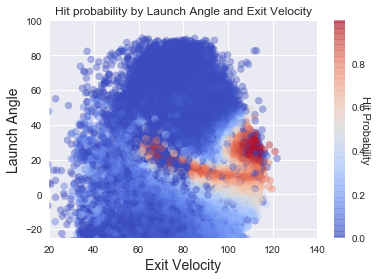

In [36]:
_ = plt.scatter(data2['launch_speed'], data2['launch_angle'], c=data2['estimated_ba_using_speedangle'],cmap='coolwarm',alpha=0.4)
_ = plt.xlabel('Exit Velocity', fontsize=14)
_ = plt.ylabel('Launch Angle', fontsize=14)
_ = plt.colorbar().set_label('Hit Probability', rotation=270)
_ = plt.xlim(20, 140)
_ = plt.ylim(-25, 100)
_ = plt.title("Hit probability by Launch Angle and Exit Velocity")

plt.show()

In [33]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`
    
    Marker size is scaled by `s` and marker color is mapped to `c`
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array 

In [29]:
# now just the home runs 
data2['hr'] = 0
data2.loc[data2['events'] == 'home_run', 'hr'] = 1
data3 = data2.loc[data2['hr'] ==1]
data3.shape

(2161, 80)

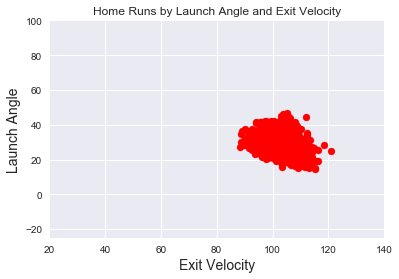

In [30]:
_ = plt.scatter(data3['launch_speed'], data3['launch_angle'],c='red')
_ = plt.xlabel('Exit Velocity', fontsize=14)
_ = plt.ylabel('Launch Angle', fontsize=14)
_ = plt.xlim(20, 140)
_ = plt.ylim(-25, 100)
_ = plt.title("Home Runs by Launch Angle and Exit Velocity")
plt.show()

In [31]:
# https://github.com/jldbc/pybaseball/blob/master/EXAMPLES/fivethirtyeight_new_science_of_hitting.ipynb